# Restaurant rating prediction case study in python

Zomato, the online food app, has reached out to you to help them to predict how good or bad a restaurant will turn out in the future. So that, they can take a decision to include the restaurant in their app or remove it.

They have shared the data of 9551 restaurants from all over the world which are currently present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

Your task is to create a machine learning model which can predict the Rating of a restaurant based on its characteristics.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Feature Engineering
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production
* I know its a long list!! Take a deep breath... and let us get started!



# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "ZomatoData.csv". This file contains 9551 restaurants details.

# Data description
The business meaning of each column in the data is as below

* <b>Restaurant ID</b></b>: The id for each restaurant
* <b>Restaurant Name</b></b>: The brand/restaurant name
* <b>Country Code</b></b>: In which country the restaurant is operating
* <b>City</b></b>: In which city the restaurant is operating
* <b>Address</b></b>: What is the address of the restaurant
* <b>Locality</b></b>: What is the locality of the restaurant
* <b>Locality Verbose</b></b>: Detailed locality description
* <b>Longitude</b></b>: GPS longitude location
* <b>Latitude</b></b>: GPS latitude location
* <b>Cuisines</b></b>: Various type of food offered
* <b>Currency</b></b>: The business currency
* <b>Has Table booking</b></b>: Is advance table booking facility available?
* <b>Has Online delivery</b></b>: Do they take online food orders?
* <b>Is delivering now</b></b>: Is it open now?
* <b>Switch to order menu</b></b>: Whether switch to order menu is available?
* <b>Price range</b></b>: The price range of the restaurant
* <b>Votes</b></b>: The number of people who voted for the rating
* <b>Average Cost for two</b></b>: The typical cost for two people
* <b>Rating</b></b>: The final rating of the restaurant

In [1]:
#Supressing the warning messages

import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing the datasets

import pandas as pd
import numpy as np

zomatodata=pd.read_csv("/Users/shubhamyadav/Desktop/FARUKH SIR IVY/DATASETS/Python Datasets/Regression Datasets/ZomatoData.csv",encoding="latin")
print("shape before removing duplicates",zomatodata.shape)

#removing duplicate rows if any
print("shape after removing the duplicates if any",zomatodata.drop_duplicates().shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
zomatodata.head(10)

shape before removing duplicates (9551, 19)
shape after removing the duplicates if any (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,Botswana Pula(P),No,No,No,No,3,336,1000,4.4
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",Botswana Pula(P),Yes,No,No,No,4,520,2000,4.0
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",Botswana Pula(P),Yes,No,No,No,4,677,2000,4.2
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",Botswana Pula(P),Yes,No,No,No,4,621,6000,4.9
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,Botswana Pula(P),Yes,No,No,No,3,532,1100,4.8


# Defining the problem statement</b>:
Create a Predictive model which can predict the future Rating of a restaurant

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible
* If Bell curve is desirable but slightly positive skew or negative skew is also fine
* If When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios. 

<AxesSubplot:ylabel='Frequency'>

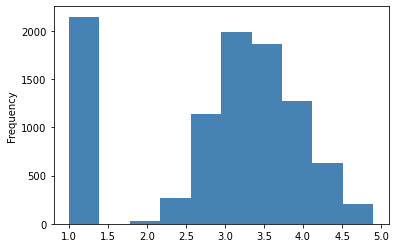

In [3]:
zomatodata["Rating"].plot.hist(color="steelblue")

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the rating of the Restaurant? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

* head() </b>: This helps to see a few sample rows of the data
* info() </b>: This provides the summarized information of the data
* describe() </b>: This provides the descriptive statistical details of the data
* nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
zomatodata.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning

zomatodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [6]:
# Looking at the descriptive statistics of the data

zomatodata.describe(include="all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
zomatodata.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Restaurant ID</b>: Qualitative. Rejected.
* <b>Restaurant Name</b>: Qualitative. Rejected.
* <b>Country Code</b>: Categorical. Selected.
* <b>City</b>: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
* <b>Address</b>: Qualitative. Rejected.
* <b>Locality</b>: Qualitative. Rejected.
* <b>Locality Verbose</b>: Qualitative. Rejected.
* <b>Longitude</b>: Continuous. Selected. This represents the location of restaurant
* <b>Latitude</b>: Continuous. Selected. This represents the location of restaurant
* <b>Cuisines</b>: Qualitative. Rejected. A new feature can be engineered from it.
* <b>Currency</b>: Categorical. Selected.
* <b>Has Table booking</b>: Categorical. Selected.
* <b>Has Online delivery</b>: Categorical. Selected.
* <b>Is delivering now</b>: Categorical. Selected.
* <b>Switch to order menu</b>: Categorical. Selected.
* <b>Price range</b>: Categorical. Selected.
* <b>Votes</b>: Continuous. Selected.
* <b>Average Cost for two</b>: Continuous. Selected.
* <b>Rating</b>: Continuous. Selected. <b> This is the Target Variable! </b>

# Feature Engineering
Some of the columns cannot be used directly for machine learning like Dates, addresses, etc. because these are qualitative in nature. Hence every row has a different string value, Hence the ML algorithms cannot learn anything from them because each row has a different description. In simple terms, no general rules can be created from such columns.

However, we can extract some information from these columns, which can be used in ML. Like from a date column we can take out month, week, quarter etc, which becomes categorical feature.

Similarly we can extract some repetitive information from address like zip codes, locality etc. however if the number of unique values is too high in them (more than 50) then it creates trouble later for the ML algorithm as the data dimensionality increases while converting such columns to dummy variables.

In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [8]:
# Function to count the number of cuisines
def count(x):
    output=len(str(x).split(","))
    return output
    

In [9]:
# Creating a new feature in data
# We will further explore the new feature just like other features

zomatodata['Cuisines count']=zomatodata["Cuisines"].apply(count)
zomatodata

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,Cuisines count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1,1
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2,3
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7,2
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0,1


In [10]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative

badcolumns=['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']

zomatodata=zomatodata.drop(badcolumns,axis=1)
zomatodata

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,Cuisines count
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28.977392,41.022793,Turkish Lira(TL),No,No,No,No,3,788,80,4.1,1
9547,208,29.041297,41.009847,Turkish Lira(TL),No,No,No,No,3,1034,105,4.2,3
9548,208,29.034640,41.055817,Turkish Lira(TL),No,No,No,No,4,661,170,3.7,2
9549,208,29.036019,41.057979,Turkish Lira(TL),No,No,No,No,4,901,120,4.0,1


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram


Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

* <b>Categorical Predictors: 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range' </b>

We use bar charts to see how the data is distributed for these categorical columns.

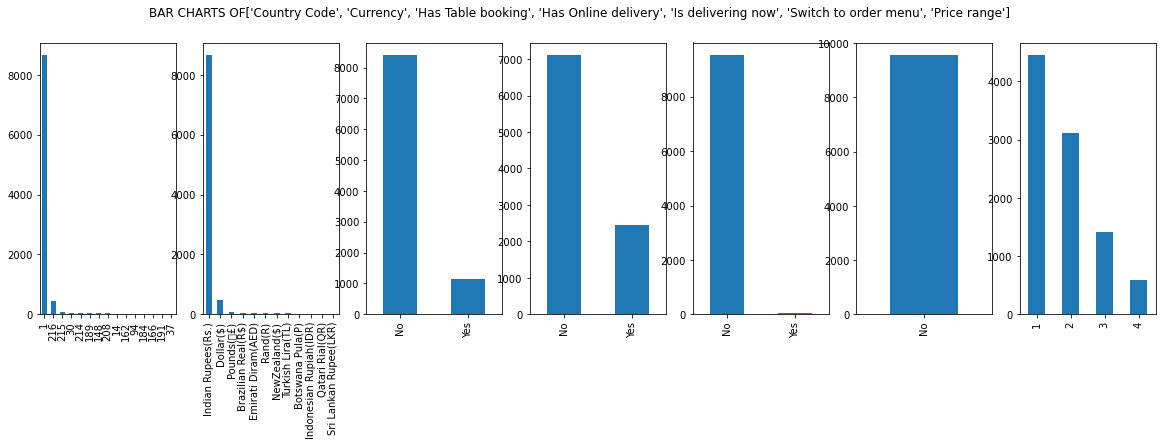

In [11]:
# creating bar charts
categoricalpredictors=['Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range']
inpdata=zomatodata
import matplotlib.pyplot as plt

fig,subplot=plt.subplots(nrows=1,ncols=len(categoricalpredictors),figsize=(20,5))
fig.suptitle("BAR CHARTS OF"+str(categoricalpredictors))

for items,location in zip(categoricalpredictors,range(len(categoricalpredictors))):
    inpdata[items].value_counts().plot(kind="bar",ax=subplot[location])
                         


# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

Selected Categorical Variables: Only three categorical variables are selected for further analysis.

<b>'Has Table booking', 'Has Online delivery', 'Price range'</b>

# Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, There are four continuous predictor variables ''Longitude', 'Latitude','Votes', and 'Average Cost for two'

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

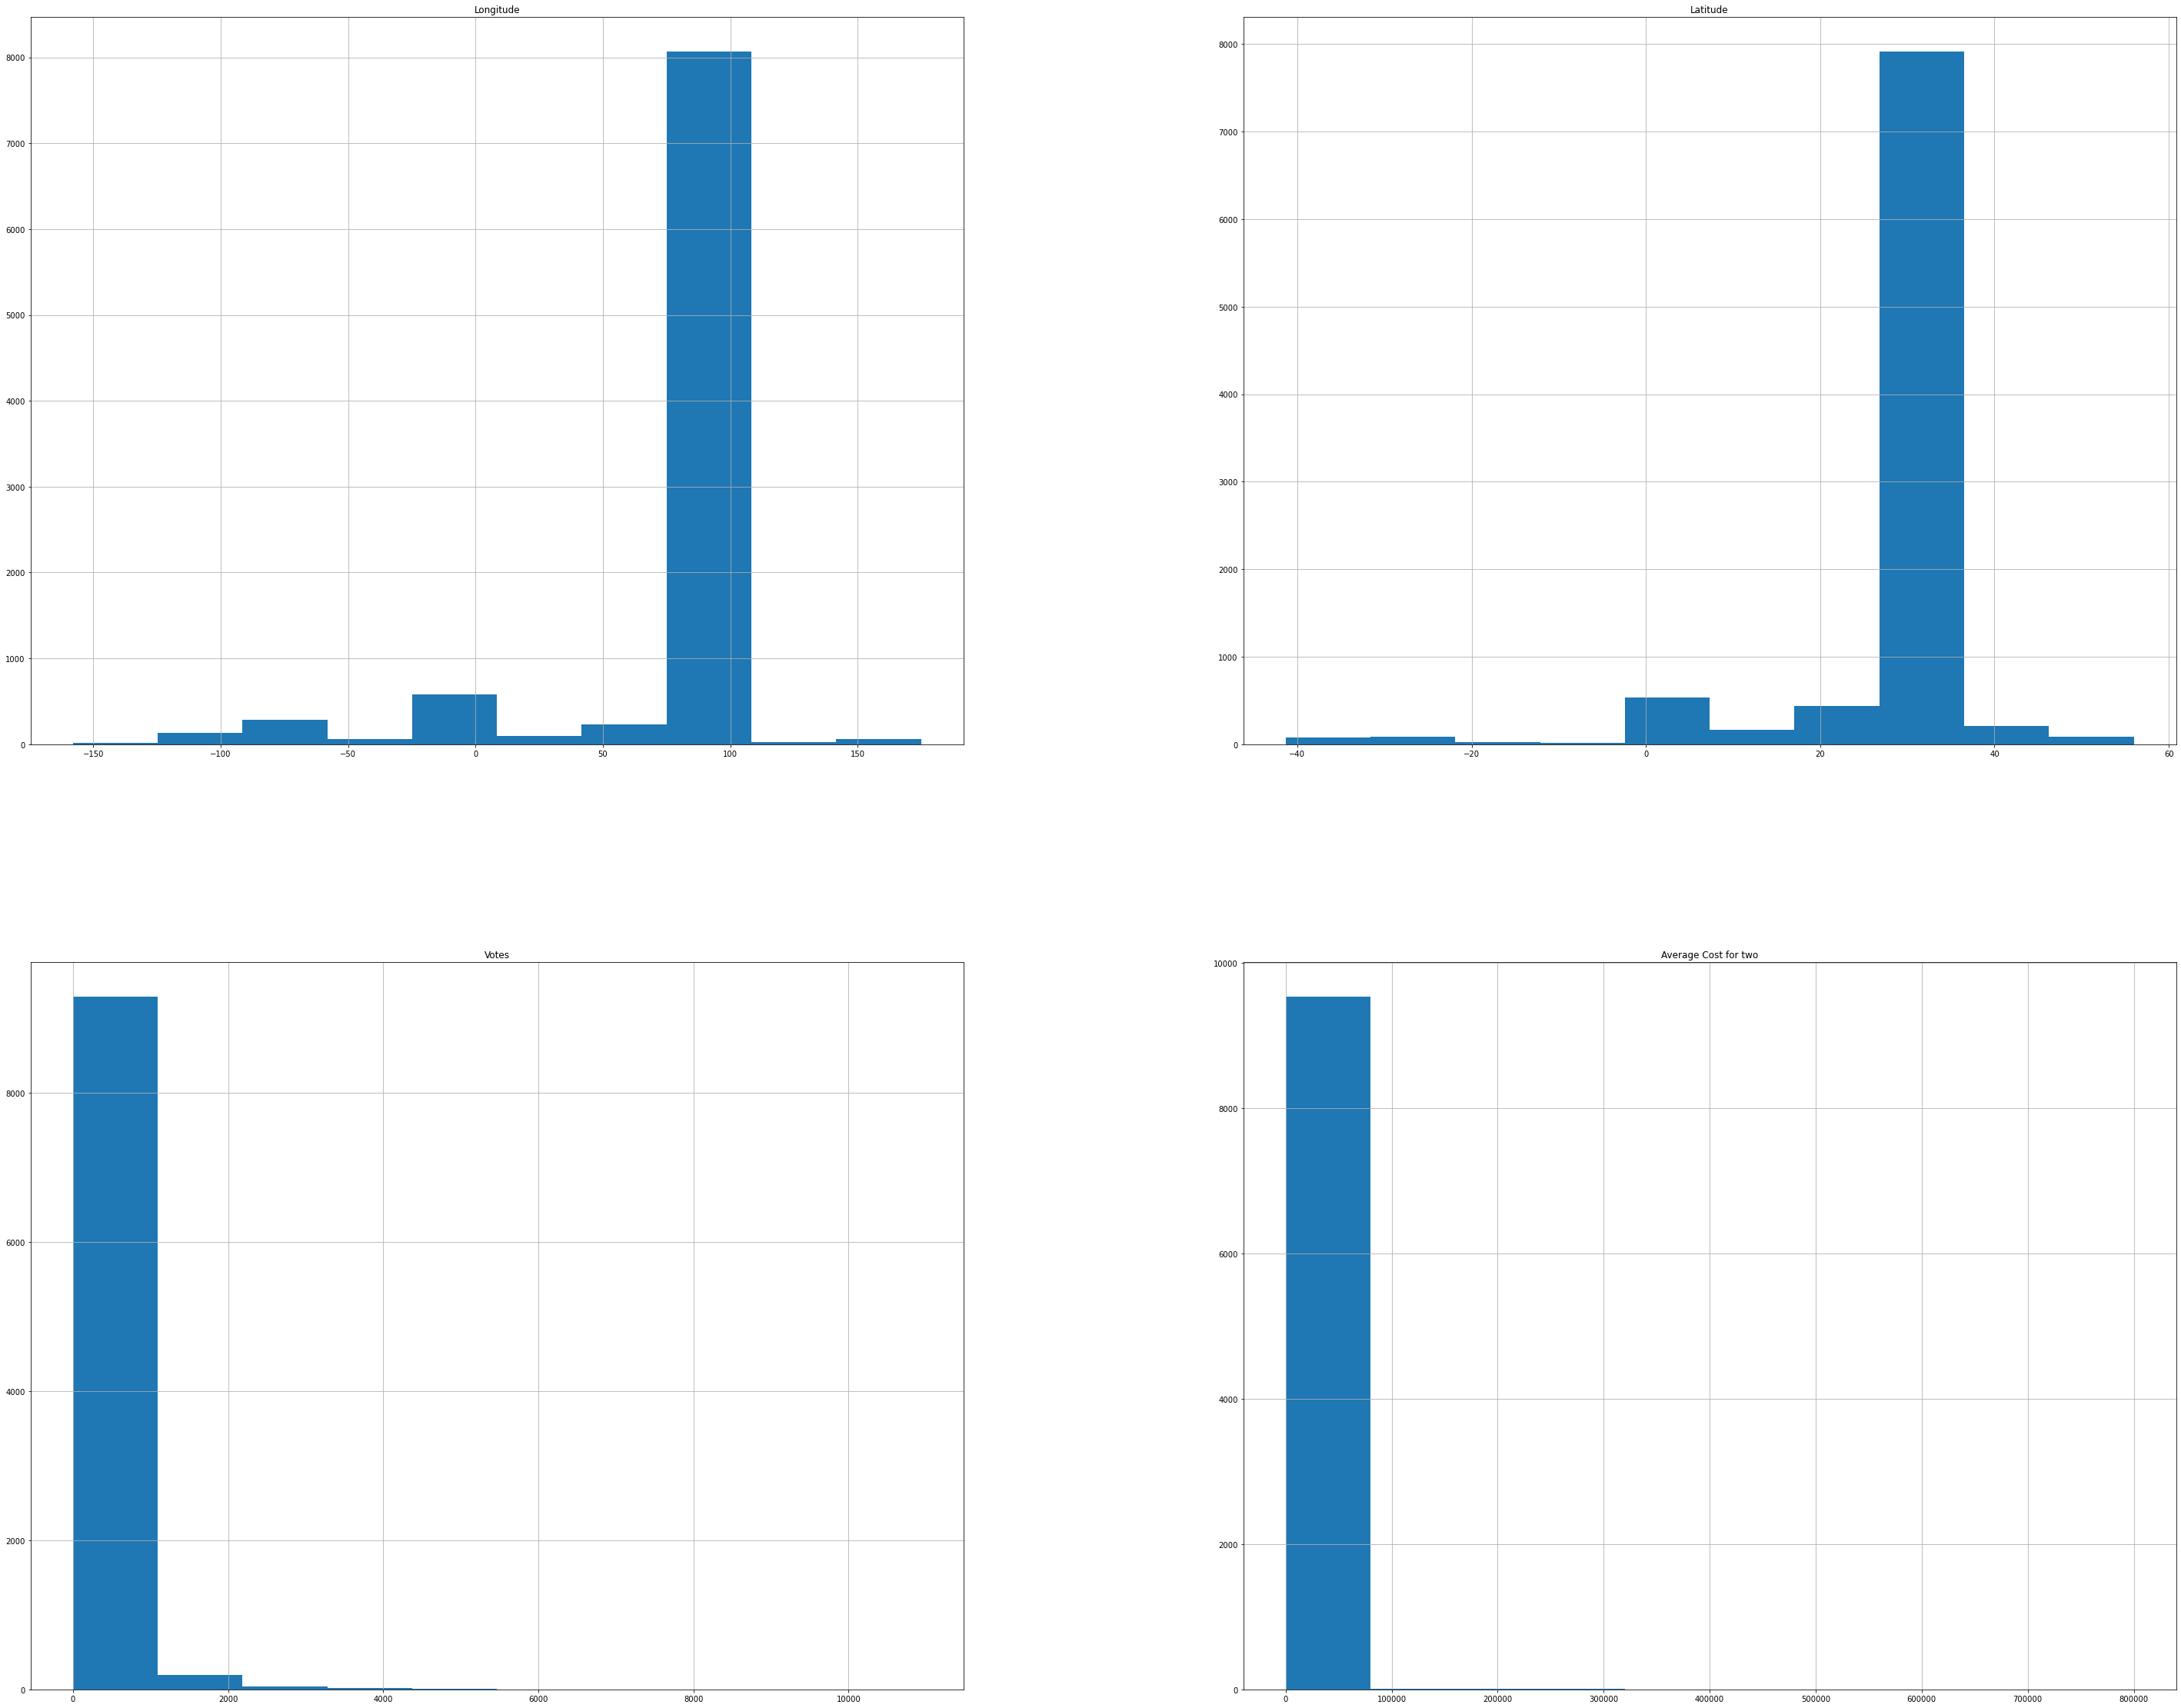

In [12]:

zomatodata.hist(['Longitude', 'Latitude','Votes', 'Average Cost for two'],figsize=(50,40))

# Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Votes", there are around 9000 rows in data that has a vote value between 0 to 1000.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* <b>Longitude</b> : Selected. The distribution is good.
* <b>Latitude</b>: Selected. The distribution is good.
* <b>Average Cost for two</b>: Selected. Outliers seen beyond 300000, need to treat them.
* <b>Votes</b>: Selected. Outliers seen beyond 4000, need to treat them.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.



# Replacing outliers for votes

In [13]:
zomatodata["Votes"][zomatodata["Votes"]<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [14]:
zomatodata["Votes"][zomatodata["Votes"]>4000]=3986

# Replacing outliers for Average Cost 

In [15]:
zomatodata["Average Cost for two"][zomatodata["Average Cost for two"]<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

In [16]:
zomatodata["Average Cost for two"][zomatodata["Average Cost for two"]>50000]=8000

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

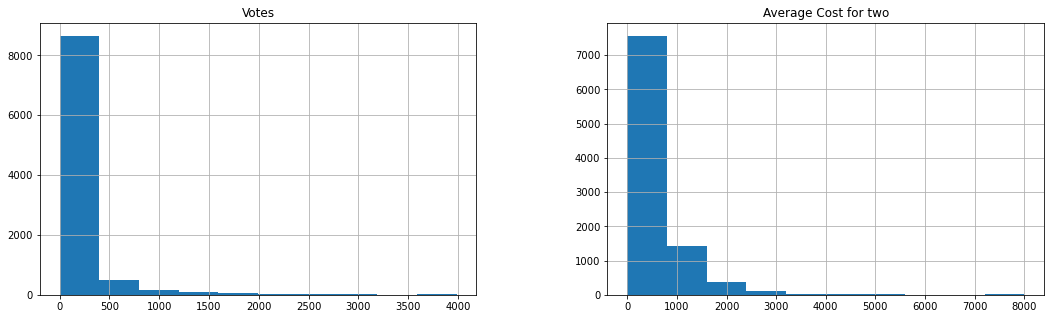

In [17]:
zomatodata.hist(["Votes","Average Cost for two"],figsize=(18,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [18]:
zomatodata.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
Cuisines count          0
dtype: int64

No missing value in the data

# <b>Feature Selection</b>
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

<b>Visual exploration of relationship between variables</b>
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

<b>Statistical measurement of relationship strength between variables<b/>
    
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test
    
In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

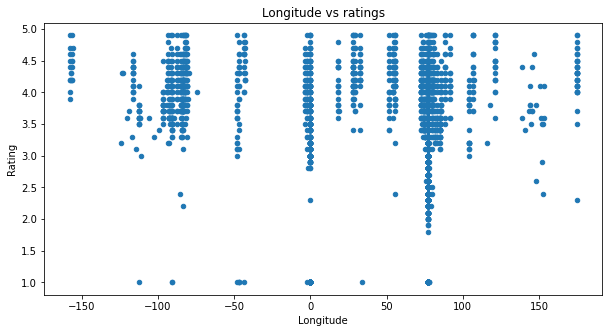

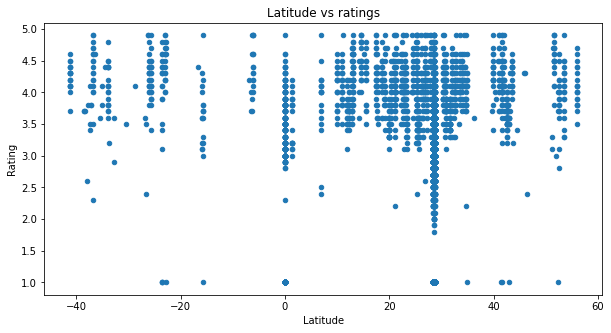

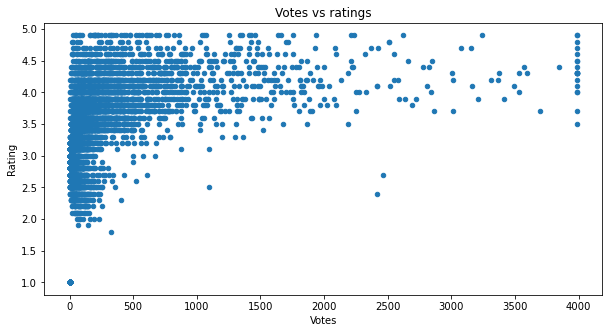

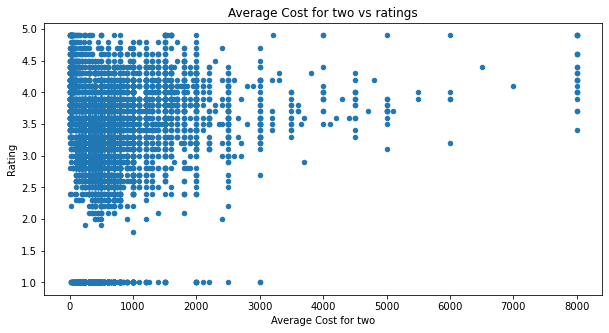

In [19]:
#visualising continous vs continous columns

predictors=['Longitude', 'Latitude','Votes', 'Average Cost for two']

for items in predictors:
    zomatodata.plot.scatter(items,"Rating",figsize=(10,5),title=(items + " vs " + "ratings"))

# Scatter charts interpretation
What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
Pearson's correlation coefficient can simply be calculated as the covariance between two features  𝑥  and  𝑦  (numerator) divided by the product of their standard deviations (denominator):



* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter

In [20]:
continouscols=['Rating','Longitude', 'Latitude','Votes', 'Average Cost for two']

correlationdata=zomatodata[continouscols].corr()
correlationdata

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [21]:
correlationdata["Rating"][abs(correlationdata["Rating"]>0.2)]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

# Finally selected continous columns

Votes,Average cost for two

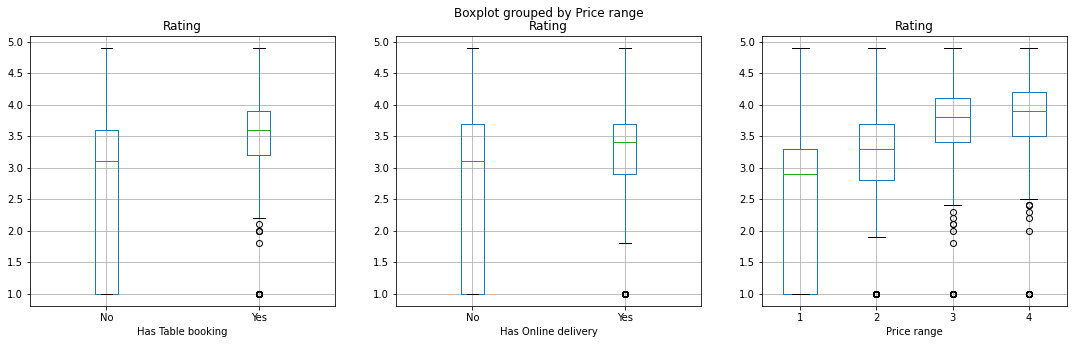

In [22]:
#visualising continous vs categorical columns using box plots

import matplotlib.pyplot as plt
categoricalcolumns=['Has Table booking', 'Has Online delivery', 'Price range']
fig,subplot=plt.subplots(nrows=1,ncols=len(categoricalcolumns),figsize=(18,5))
for items,loc in zip(categoricalcolumns,range(len(categoricalcolumns))):
    zomatodata.boxplot("Rating",items,ax=subplot[loc])

# Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below



# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def annova(inpdata,targetcolumn,predictor):
    from scipy.stats import f_oneway
    selectedpredictors=[]
    
    for items in predictor:
        categoricaldata=inpdata.groupby(items)[targetcolumn].apply(list)
        annovaresult=f_oneway(*categoricaldata)
        
        if annovaresult[1]<0.05:
            print(items,"is correlated with",targetcolumn,"P VALUE:",annovaresult[1])
            selectedpredictors.append(items)
            
        else:
            print(items,"is not related with",targetcolumn,"P VALUE:",annovaresult[1])
    return (selectedpredictors)


In [24]:
predictor=['Has Table booking', 'Has Online delivery', 'Price range']



annova(inpdata=zomatodata,targetcolumn="Rating",predictor=categoricalcolumns)

Has Table booking is correlated with Rating P VALUE: 3.9393041304297214e-82
Has Online delivery is correlated with Rating P VALUE: 1.6952587420575958e-92
Price range is correlated with Rating P VALUE: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

# Final selected categorical column
'Has Table booking', 'Has Online delivery', 'Price range'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [25]:
#selecting final columns

selectedcolumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

In [26]:
dataforml=zomatodata[selectedcolumns]
dataforml.head(20)

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4
5,336,1000,No,No,3
6,520,2000,Yes,No,4
7,677,2000,Yes,No,4
8,621,6000,Yes,No,4
9,532,1100,Yes,No,3


In [27]:
# Saving this final data for reference during deployment
dataforml.to_pickle('dataforml.pkl')

# 3 Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* In this data there is no Ordinal categorical variable.

# Converting the binary nominal variable to numeric using 1/0 mapping¶

In [28]:
dataforml["Has Online delivery"].replace({"Yes":1,"No":0},inplace=True)
dataforml["Has Table booking"].replace({"Yes":1,"No":0},inplace=True)

dataforml

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,1,0,3
1,591,1200,1,0,3
2,270,4000,1,0,4
3,365,1500,0,0,4
4,229,1500,1,0,4
...,...,...,...,...,...
9546,788,80,0,0,3
9547,1034,105,0,0,3
9548,661,170,0,0,4
9549,901,120,0,0,4


# Converting the binary nominal variable to numeric using get dummies


In [29]:
dataforml=pd.get_dummies(dataforml)

#adding target variable to the data
dataforml["Rating"]=zomatodata["Rating"]

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [30]:
dataforml.columns

Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

In [31]:
#Seprate target variables and predictors
targetcolumn=["Rating"]
predictorcolumns=['Votes', 'Average Cost for two', 'Has Table booking','Has Online delivery', 'Price range']

In [79]:
y=dataforml[targetcolumn].values
X=dataforml[predictorcolumns].values

#splitting the data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=428,test_size=0.30)



In [91]:
#sanity check for sampled data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6685, 5)
(2866, 5)
(6685, 1)
(2866, 1)


# Standardization/Normalization of data

In [88]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMax normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
#sanity check for sampled data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 5)
(2866, 5)
(6685, 1)
(2866, 1)


In [74]:
X_train #70 percent data

array([[0.01103864, 0.0625    , 0.33333333],
       [0.00250878, 0.0625    , 0.33333333],
       [0.        , 0.075     , 0.33333333],
       ...,
       [0.        , 0.03125   , 0.        ],
       [0.01655795, 0.2       , 1.        ],
       [0.04892122, 0.075     , 0.33333333]])

In [75]:
X_test #70 percent predicted data

array([[0.01354742, 0.04375   , 0.        ],
       [0.02107376, 0.0875    , 0.33333333],
       [0.00903161, 0.06875   , 0.33333333],
       ...,
       [0.09056698, 0.09375   , 0.33333333],
       [0.        , 0.0375    , 0.        ],
       [0.00852985, 0.0375    , 1.        ]])

In [76]:
y_train #30 percent data

array([3.9, 3.1, 1. , ..., 1. , 4.4, 3.7])

In [77]:
y_test #30 percent predicted data

array([2.1, 4.1, 3.2, ..., 3.5, 1. , 3.9])

# Multiple Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

Regmodel=LinearRegression()
print(Regmodel)
#creating the model on training data
LREG=Regmodel.fit(X_train,y_train)
predictions=LREG.predict(X_test)


#measuring how well our data fit in the model
from sklearn import metrics
print("R2_score",metrics.r2_score(y_train,LREG.predict(X_train)))

print("\n ######### MODEL ACCURACY AND PREDICTIONS #####")

#creating sample dataframe to check our predictions
testingdata=pd.DataFrame(X_test,columns=predictorcolumns)
testingdata["Rating"]=y_test
testingdata["Predicted Rating"]=np.round(predictions)

#calculating APE
testingdata["APE"]=100*(abs(testingdata["Rating"]-testingdata["Predicted Rating"]))/testingdata["Rating"]
testingdata

print("\n",testingdata[['Rating',"Predicted Rating",'APE']].head())
#calculating MAPE
MAPE=np.mean(testingdata["APE"])
MEDIANMAPE=np.median(testingdata['APE'])


#finding the accuracy 
ACCURACY=print("\nMEAN ACCURACY OF THE TEST DATA",100-MAPE)
MEDIANACCURACY=print("MEDIAN ACCURACY OF THE TEST DATA",100-MEDIANMAPE)


#defining a custom function to determine accuracy

def accuracy(original,prediction):
    mapefunction=np.mean(100*((abs(original-prediction))/original))
    accuracyfunction=100-mapefunction
    
    return accuracyfunction

#custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_scorer=make_scorer(accuracy,greater_is_better=True)


#importing cross validation function from sklearn

from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test

accuracy_value=cross_val_score(Regmodel,X,y,scoring=custom_scorer,cv=10)
print("\nAccuracy value for 10-k fold cross validation",accuracy_value)
print("\nMean accuracy value for 10-k fold cross validation",round(np.mean(accuracy_value),2))

LinearRegression()
R2_score 0.30651463134648715

 ######### MODEL ACCURACY AND PREDICTIONS #####

    Rating  Predicted Rating        APE
0     2.1               2.0   4.761905
1     4.1               3.0  26.829268
2     3.2               3.0   6.250000
3     4.4               3.0  31.818182
4     3.5               2.0  42.857143

MEAN ACCURACY OF THE TEST DATA 56.823823714822296
MEDIAN ACCURACY OF THE TEST DATA 74.07407407407408

Accuracy value for 10-k fold cross validation [73.07128832 57.23634237 61.61405423 59.97790149 62.17608774 29.03036814
 48.84028175 51.06832392 40.27174351 53.61838933]

Mean accuracy value for 10-k fold cross validation 53.69


In [94]:
#Showing the dataset again now with the predicted column


testingdata=pd.DataFrame(X_test,columns=predictorcolumns)
testingdata["Rating"]=y_test
testingdata["Predicted Rating"]=np.round(predictions)

testingdata

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating,Predicted Rating
0,0.013547,0.04375,0.0,0.0,0.000000,2.1,2.0
1,0.021074,0.08750,0.0,1.0,0.333333,4.1,3.0
2,0.009032,0.06875,0.0,0.0,0.333333,3.2,3.0
3,0.040893,0.02500,0.0,1.0,0.000000,4.4,3.0
4,0.003512,0.05000,0.0,0.0,0.000000,3.5,2.0
...,...,...,...,...,...,...,...
2861,0.005268,0.02125,0.0,0.0,1.000000,4.6,4.0
2862,0.025088,0.16250,1.0,1.0,0.666667,3.5,4.0
2863,0.090567,0.09375,0.0,1.0,0.333333,3.5,3.0
2864,0.000000,0.03750,0.0,0.0,0.000000,1.0,2.0


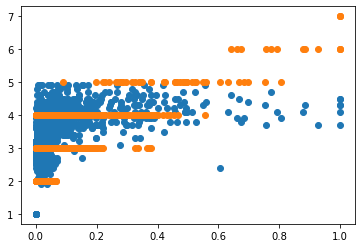

In [96]:
import matplotlib.pyplot as plt

plt.scatter(x=testingdata["Votes"],y=testingdata["Rating"])
plt.scatter(x=testingdata["Votes"],y=testingdata["Predicted Rating"])


In [85]:
#checking the value of M

LREG.coef_

array([[ 7.33995641e-04, -8.59248666e-05, -1.60113103e-01,
         4.13668140e-01,  5.28139033e-01]])

In [86]:
#checking the value of C

LREG.intercept_

array([1.7913507])

# DECISION TREE

DecisionTreeRegressor(max_depth=6)
R2 Value: 0.9120831300688722

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.61407688871984
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.79867804 92.40734815 92.36096482 92.60045486 92.95525464 95.05770184
 93.713076   93.81800852 92.90082114 91.96501727]

Final Average Accuracy of the model: 92.86


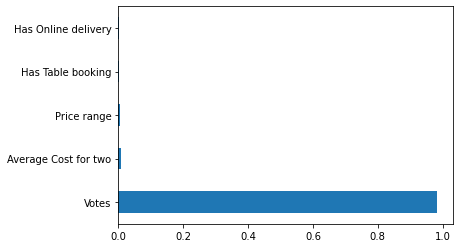

In [125]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=regModel.fit(X_train,y_train)
predictionS=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=predictorcolumns)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=predictorcolumns)
TestingDataResults["Rating"]=y_test
TestingDataResults[('Predicted'+'Rating')]=np.round(predictionS)

# Printing sample prediction values
print(TestingDataResults[['Rating','PredictedRating']].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



In [48]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=predictorcolumns)
TestingDataResults["Rating"]=y_test
TestingDataResults[('Predicted'+'Rating')]=np.round(prediction)

TestingDataResults

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating,PredictedRating
0,41,700,0,0,2,3.2,3.0
1,44,650,0,0,2,3.2,3.0
2,24,450,0,0,1,3.5,3.0
3,147,1400,1,1,3,4.1,3.0
4,163,600,1,1,2,4.2,3.0
...,...,...,...,...,...,...,...
2861,51,300,0,0,1,3.3,3.0
2862,1,200,0,0,1,1.0,1.0
2863,35,25,0,0,2,3.3,3.0
2864,91,650,0,1,2,4.0,3.0


In [50]:
import os
os.environ["PATH"] += os.pathsep + "/Users/shubhamyadav/opt/anaconda3/lib/python3.9/site-packages"

In [51]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=predictorcolumns, class_names=targetcolumn)


# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)

digraph Tree {
node [shape=box] ;
0 [label="Votes <= 3.5\nmse = 1.274\nsamples = 6685\nvalue = 2.898"] ;
1 [label="mse = 0.0\nsamples = 1493\nvalue = 1.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Votes <= 94.5\nmse = 0.307\nsamples = 5192\nvalue = 3.443"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Votes <= 16.5\nmse = 0.172\nsamples = 3102\nvalue = 3.184"] ;
2 -> 3 ;
4 [label="Price range <= 3.5\nmse = 0.054\nsamples = 1132\nvalue = 3.004"] ;
3 -> 4 ;
5 [label="Average Cost for two <= 95.0\nmse = 0.044\nsamples = 1101\nvalue = 2.993"] ;
4 -> 5 ;
6 [label="Price range <= 1.5\nmse = 0.203\nsamples = 21\nvalue = 3.381"] ;
5 -> 6 ;
7 [label="mse = 0.102\nsamples = 8\nvalue = 3.075"] ;
6 -> 7 ;
8 [label="mse = 0.173\nsamples = 13\nvalue = 3.569"] ;
6 -> 8 ;
9 [label="Votes <= 11.5\nmse = 0.038\nsamples = 1080\nvalue = 2.985"] ;
5 -> 9 ;
10 [label="mse = 0.026\nsamples = 767\nvalue = 2.962"] ;
9 -> 10 ;
11 [label="mse = 0.063

InvocationException: GraphViz's executables not found

# Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

<b> I am choosing Decision Trees as the final model since it is very fast for this data! </b>

In order to deploy the model we follow below steps

Train the model using 100% data available
Save the model as a serialized file which can be stored anywhere
Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

# Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Votes', 'Average Cost for two', 'Price range'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [176]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Votes', 'Average Cost for two', 'Price range']

X=dataforml[Predictors].values
y=dataforml[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(9551, 3)
(9551,)


<b> Step 1. Retraining the model using 100% data </b>

In [127]:
# choose from different tunable hyper parameters
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')

# Training the model on 100% Data available
FinalDecisionTreeModel=RegModel.fit(X,y)

<b> Cross validating the final model accuracy with less predictors </b>


In [129]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.88375632 92.62959923 92.20786898 92.61384604 92.9569189  95.03041735
 93.69824727 93.89884371 92.78497662 91.88320574]

Final Average Accuracy of the model: 92.86


<b> Step 2. Save the model as a serialized file which can be stored anywhere </b>

In [164]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /Users/shubhamyadav/Desktop/PROJECTS


<b>Creating a python function </b>

In [167]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0] #(2,3) HENCE Num_Inputs=2
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('dataforml.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Votes', 'Average Cost for two', 'Price range']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['PREDICTED_RATINGS'])
    return(PredictionResult)

# Calling the function for new sample data

In [177]:

NewSampleData=pd.DataFrame(
data=[[314,1100,2],
     [51,1000,3]],
columns=['Votes', 'Average Cost for two', 'Price range'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Votes  Average Cost for two  Price range
0    314                  1100            2
1     51                  1000            3


,PREDICTED_RATINGS
0,3.824441
1,3.540833
